<a id="table_of_contents"></a>
# Data Exploration: Numerical Data Field deepdive

**This notebook provides a wide range of examples of analyses done on individual numerical variables**.

Table of contents

...

**We begin by importing key libraries for data handling and exploration**

In [1]:
# Import key libraries
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

**The following cell imports OW-style formatting for charts, e.g. code and axes styles**

The code is entirely optional, and makes use of two files within the resources folder:
* ow_style.mplstyle, which contains general color and formatting schemes
* ow_colormap.py, which contains code for colormaps that map numbers to a color scale (e.g. for heatmaps)

The mplstyle file is imported using matplotlib's method 'plt.style.use'. The ow_colormap is a regular .py script file that needs to be imported using 'import', and to do so, the path needs to be made available through sys.path. Here we are setting the path to the 'utilities' folder.

In [4]:
# Load in OW color scheme and plot style
plt.style.use('../../utilities/resources/ow_style.mplstyle')

# Add path of the folder 'resources' to the path from which we can import modules  
import sys
sys.path.append('../../utilities')
from resources.ow_colormap import ow_colormap 

from data_exploration import univariate

In [5]:
%load_ext autoreload
%autoreload 2

**Load csv containing data into pandas**

For an overview of this dataset, see the "dataset_overview.ipynb" notebook.

In [6]:
# Read in the data using pandas, with low_memory=False in case the dataset is large
input_data = pd.read_csv("sample_input/exploration_hmda_lar.csv", low_memory=False)

In [7]:
# Numerical columns
numerical_columns = input_data.select_dtypes(include=np.number).columns.sort_values().tolist()
numerical_columns

['action_taken',
 'agency_code',
 'applicant_ethnicity',
 'applicant_income_000s',
 'applicant_race_1',
 'applicant_race_2',
 'applicant_race_3',
 'applicant_race_4',
 'applicant_race_5',
 'applicant_race_name_3',
 'applicant_race_name_4',
 'applicant_race_name_5',
 'applicant_sex',
 'application_date_indicator',
 'as_of_year',
 'census_tract_number',
 'co_applicant_ethnicity',
 'co_applicant_race_1',
 'co_applicant_race_2',
 'co_applicant_race_3',
 'co_applicant_race_4',
 'co_applicant_race_5',
 'co_applicant_race_name_2',
 'co_applicant_race_name_3',
 'co_applicant_race_name_4',
 'co_applicant_race_name_5',
 'co_applicant_sex',
 'county_code',
 'denial_reason_1',
 'denial_reason_2',
 'denial_reason_3',
 'edit_status',
 'hoepa_status',
 'hud_median_family_income',
 'lien_status',
 'loan_amount_000s',
 'loan_purpose',
 'loan_type',
 'minority_population',
 'msamd',
 'number_of_1_to_4_family_units',
 'number_of_owner_occupied_units',
 'owner_occupancy',
 'population',
 'preapproval',
 '

<a href="#table_of_contents">(Back to top)</a>
<a id='univariate_distribution'></a>
# Univariate distribution information

This section provides statistics and plots to analyze individual numerical variables. 


## Moments, Statistics, Quantiles, and Extremes

**We start with a function that generates a wide range of information**

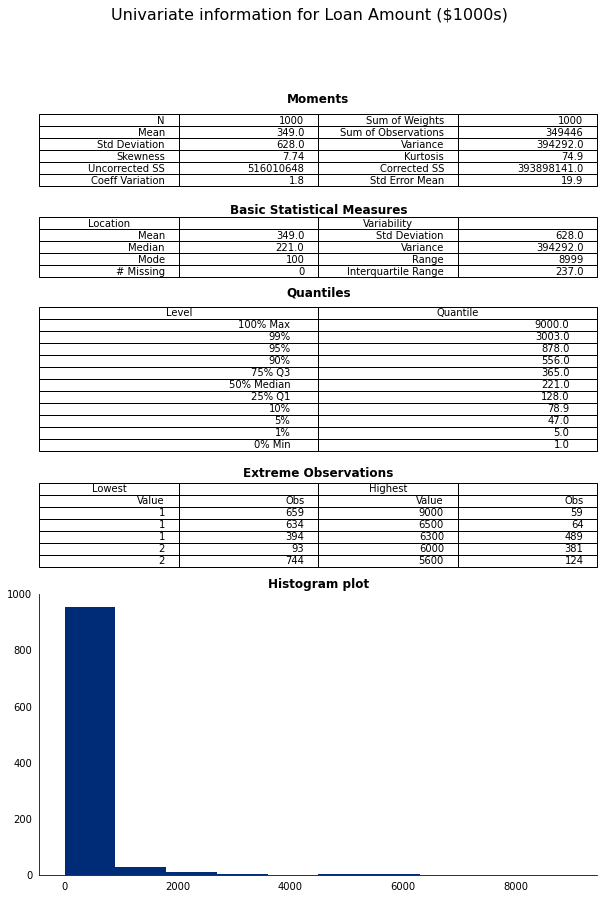

In [8]:
variable = 'loan_amount_000s'
variable_name = "Loan Amount ($1000s)"

output, results = univariate.univariate_summary_numeric(input_data[variable], variable_name, weights=None)
output

**You can access the tables from these results, as they are stored in a dictionary with the following keys**

* moments
* stats
* quantile
* extreme

In [9]:
results['stats']

,0,1,2,3
0,Mean,349.0,Std Deviation,628.0
1,Median,221.0,Variance,394292.0
2,Mode,100,Range,8999
3,# Missing,0,Interquartile Range,237.0


**You can export these as png files**

In [10]:
variables = [
    'action_taken', 'hud_median_family_income', 'loan_amount_000s', 'loan_purpose', 'number_of_1_to_4_family_units',
    'number_of_owner_occupied_units', 'property_type', 'tract_to_msamd_income'
]

univariate.export_univariate_summary_numeric(input_data, variables, output_folder = "sample_output")

Processing action_taken
Processing hud_median_family_income
Processing loan_amount_000s
Processing loan_purpose
Processing number_of_1_to_4_family_units
Processing number_of_owner_occupied_units
Processing property_type
Processing tract_to_msamd_income


'Completed'

## Histograms

**Histograms can be tricky for datasets with big outliers or fat tails. Here we show a few methods to scale or transform the plot**

**Standard histogram**

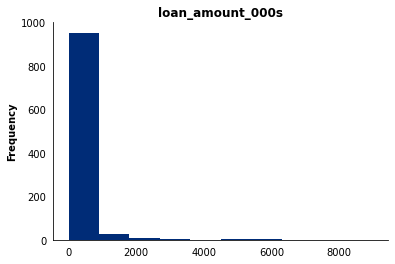

In [11]:
variable = 'loan_amount_000s'

fig, ax = plt.subplots()
ax.hist(input_data[variable])
ax.set_title(variable)
ax.set_ylabel('Frequency')
plt.show()

**Since one bar is substantially greater than others, we can log-transform the y-axis, as well as add count labels**

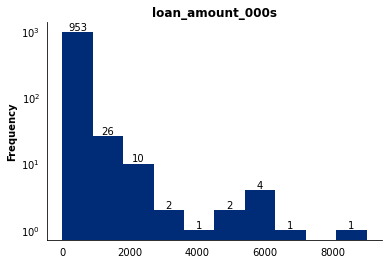

In [12]:
fig, ax = plt.subplots()
freq, bins, patches = ax.hist(input_data[variable])
ax.set_title(variable)
ax.set_ylabel('Frequency')
ax.set_yscale('log')

# x coordinate for labels
bin_centers = np.diff(bins)*0.5 + bins[:-1]

n = 0
for fr, x, patch in zip(freq, bin_centers, patches):
    height = int(freq[n])
    plt.annotate("{}".format(height),
               xy = (x, height),            
               xytext = (0,0.2),             
               textcoords = "offset points", 
               ha = 'center', va = 'bottom'
               )
    n = n+1
plt.show()

**If we wanted zoom in closer into the lower thousands, we can:**
- Subset the dataset
- Log-transform the x-variable: Note, set_xscale will not work, and instead transform the x-variable
- Select a different binning schema


**The following functions provide some of these capabilities**

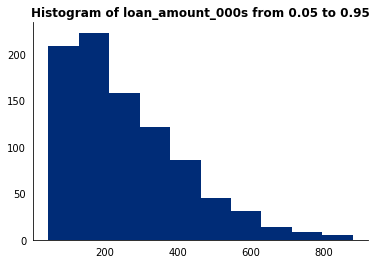

In [25]:
# Show the body of the distribution based on percentiles 

variable = 'loan_amount_000s'

fig = univariate.plot_histogram_body(
    data = input_data[variable], 
    variable_name = variable, 
    min_val=None, max_val=None,
    prob_exclude = 0.05,   # 5th and 95th percentile
    winsorize=False
)

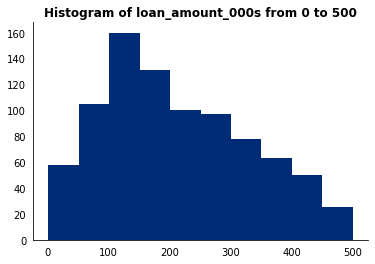

In [26]:
# Show the body of the distribution based on min and max values

variable = 'loan_amount_000s'

fig = univariate.plot_histogram_body(
    data = input_data[variable], 
    variable_name = variable, 
    min_val=0, max_val=500,   # Show histogram from 0 to 500
    prob_exclude = None,   
    winsorize=False
)

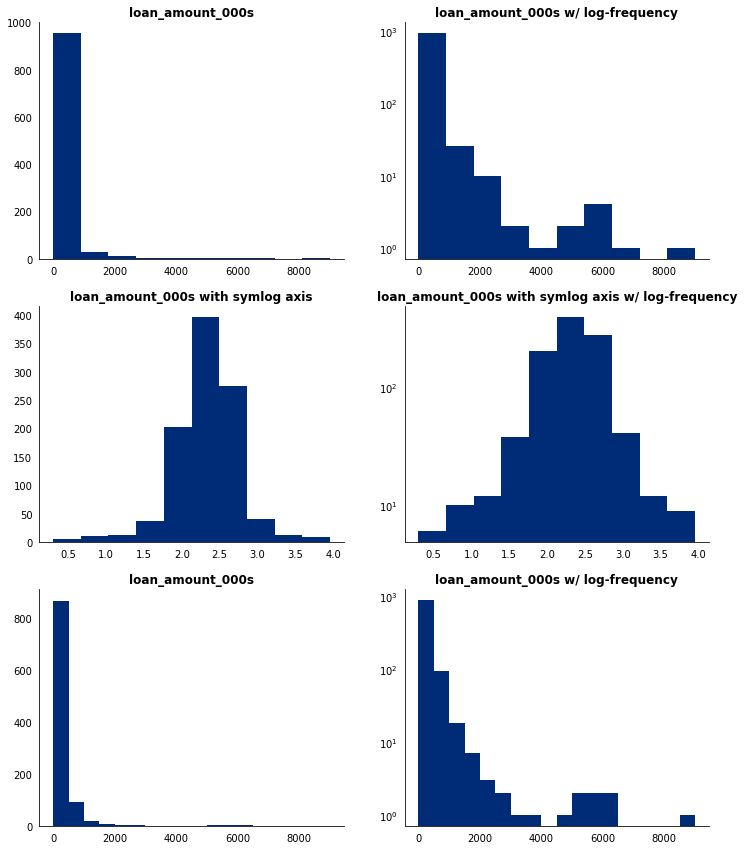

In [36]:
# Plot several advanced histograms, allowing for very skewed data
variable = 'loan_amount_000s'
fig = univariate.plot_histogram_advanced(input_data[variable], variable)

# Two-variable relationships

## Joint plot with two continuous variables

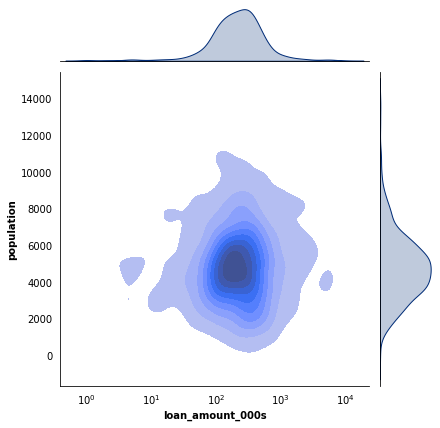

In [79]:
sample_size = 1000
variable_1 = 'loan_amount_000s'
variable_2 = 'population'

plot_data = input_data[[variable_1,variable_2]].dropna()
if plot_data.shape[0] > sample_size:
    plot_data = plot_data.sample(sample_size)

fig = sns.jointplot(x = plot_data[variable_1], y=plot_data[variable_2], log_scale=[True, False], kind="kde", fill=True)
fig

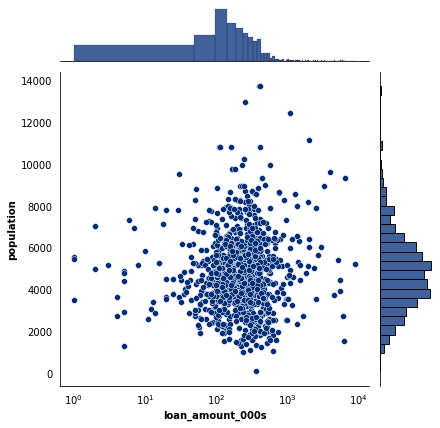

In [84]:
fig = sns.jointplot(x = plot_data[variable_1], y=plot_data[variable_2], kind='scatter')
fig.ax_joint.set_xscale('log')
# fig.ax_joint.set_yscale('log')

## Violinplot between a continuous and one categorical/discrete variables

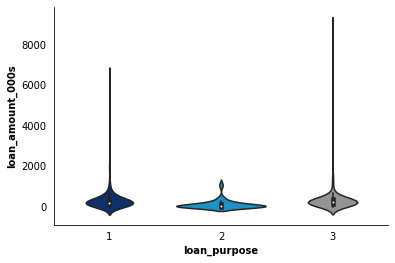

In [54]:
sample_size = 1000
num_var = 'loan_amount_000s'
cat_var = 'loan_purpose'

plot_data = input_data[[variable_1,variable_2]].dropna()
if plot_data.shape[0] > sample_size:
    plot_data = plot_data.sample(sample_size)

fig = sns.violinplot(x=cat_var, y=num_var, data=plot_data)

In [ ]:
# LOG AND SYMLOG VERSION OF THE VIOLIN PLOT TO COME

# log_data = [[np.log10(d) for d in row] for row in data]

# fig, ax = plt.subplots(ncols=3, figsize=(16, 5), sharey=True)
# sns.violinplot(data=log_data, ax=ax[0])
# ax[0].yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
# ymin, ymax = ax[0].get_ylim()
# tick_range = np.arange(np.floor(ymin), ymax)
# ax[0].yaxis.set_ticks(tick_range)
# ax[0].yaxis.set_ticks([np.log10(x) for p in tick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)
# plt.tight_layout()
# plt.show()

## Histogram plot of a continuous by unique values of a categorical/discrete variable

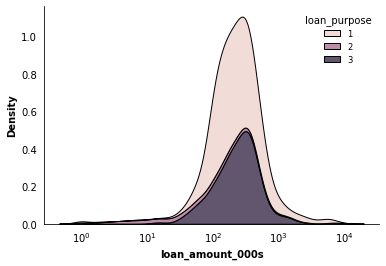

In [91]:
sample_size = 1000
num_var = 'loan_amount_000s'
cat_var = 'loan_purpose'

plot_data = input_data[[num_var,cat_var]].dropna()
fig = sns.kdeplot(data=plot_data, x=num_var, hue=cat_var, multiple="stack", log_scale=True)

## Barchart - statistics by group

In [66]:
# Identify the top 10 most frequent counties and calculate their average applicant income using groupby

counties_count = input_data['county_name'].value_counts()
top_10_counties = counties_count.index.tolist()[:10]
top_10_counties_data = input_data.loc[input_data['county_name'].isin(top_10_counties), ]

summarized_data = top_10_counties_data.groupby("county_name")[['applicant_income_000s','loan_amount_000s']].agg([np.mean, np.min, np.max, len])
summarized_data

applicant_income_000s                    loan_amount_000s  \
                                    mean  amin    amax  len             mean   
county_name                                                                    
Kings County                  146.615385  27.0   669.0   64       571.703125   
Monroe County                  87.317568  18.0   355.0  158       150.164557   
Nassau County                 157.115044  21.0   752.0  117       355.222222   
New York County              1206.964286  24.0  9999.0   36      2013.000000   
Queens County                 104.046154  17.0   348.0   76       378.210526   
Richmond County               103.320000  29.0   281.0   32       332.593750   
Suffolk County                178.698795  21.0  2434.0  179       321.424581   
Tompkins County               121.800000  32.0   818.0   50       212.480000   
Ulster County                  95.290323  26.0   503.0   31       171.483871   
Westchester County            256.761905  25.0  2988.0   46       525.173913   

                                    
                   amin  amax  len  
county_name                         
Kings County         14  5500   64  
Monroe County         3   548  158  
Nassau County        50  2360  117  
New York County       2  9000   36  
Queens County         1  1650   76  
Richmond County       1   663   32  
Suffolk County        2  2500  179  
Tompkins County      32   850   50  
Ulster County        50   561   31  
Westchester County   97  2680   46

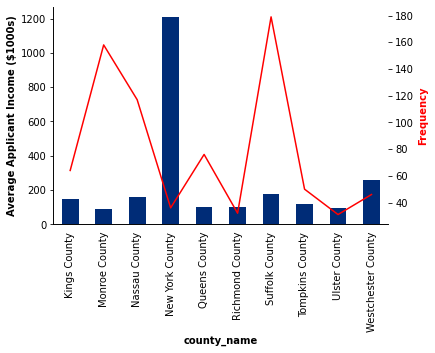

In [69]:
# Plot average income by top 10 more frequent counties
ax = summarized_data['applicant_income_000s']['mean'].plot(kind='bar')
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
summarized_data['applicant_income_000s']['len'].plot(color='red', ax=ax2)
ax.set_ylabel('Average Applicant Income ($1000s)')# Label the y-axis
ax2.set_ylabel('Frequency', color='red')

plt.show()

# Three-variable relationships

## Scatterplot by group

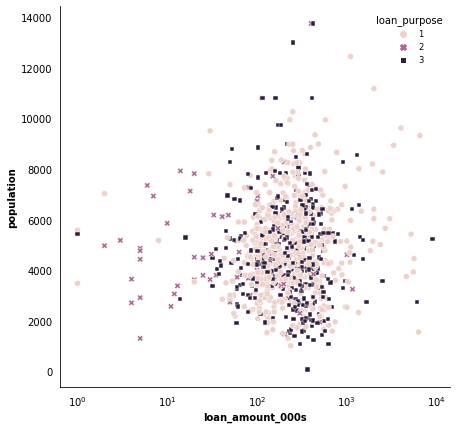

In [73]:
sample_size = 3000
variable_1 = 'loan_amount_000s'
variable_2 = 'population'
seg_var = 'loan_purpose'

plot_data = input_data[[variable_1,variable_2, seg_var]].dropna()
if plot_data.shape[0] > sample_size:
    plot_data = plot_data.sample(sample_size)
    
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="linear")
f = sns.scatterplot(data=plot_data, x=variable_1, y=variable_2, hue=seg_var, style=seg_var, ax=ax)